In [16]:
### Aufgabe 3 ###
import numpy as np

## Matrix M2 und Vektor r2 definieren
M2 = np.array([[1,1,1],[1,0,1],[0,1,0],[1,7,2],[21,15,8],[31,2,12]])
r2 = np.array([[1],[0],[1],[0],[1],[0]])

## Ausgabe und Check von M2 und r2
print(M2)                                                                              # Überprüfen der eingebenen Vektoren auf korrekte Interpretation von Python
print(r2)

## a) Tranponierte der Matrix M2 erzeugen
M2_transpose = np.transpose(np.array([[1,1,1],[1,0,1],[0,1,0],[1,7,2],[21,15,8],[31,2,12]]))    # Transponieren der Matrix mit numpy.transpose
print(f"a) Die Transponierte Matrix M2 lautet: \n {M2_transpose}")

## b) Inverse der Matrix M2 bilden, sofern möglich. Andernfalls die Pseudoinverse der Matrix M2 bilden
                                                                                       # Anmerkung: Bildung der Inverse grundsätzlich nicht möglich, da Matrix nicht quadratisch ist [6 Zeilen, 3 Spalten]
try:
    M2_inverse = np.linalg.inv(M2)
    print(f"b) Die Inverse Matrix M2^(-1) lautet:\n {M2_inverse}")                     # Der Try-Except-Block ermöglicht es uns, dass Python uns einen "entweder oder" Output zurückgibt.
except np.linalg.LinAlgError:                                                          # Sofern die Bildung von M2_inverse mittels numpy.linalg.inv nicht möglich ist, wird numpy.linalg.pinv ausgeführt. 
    M2_pseudoinverse = np.linalg.pinv(M2)
    print(f"b) Die Pseudoinverse Matrix M2^(+) lautet:\n {M2_pseudoinverse}")

## c) Determinante der Matrix M2 berechnen
try:
    M2_det = np.linalg.det(M2)                                                         # Try-Except-Block (siehe Kommentar oben)
    print(f"c) Die Determinante der Matrix beträgt: \n {M2_det}")
          
except np.linalg.LinAlgError:
    M2_gram = np.dot(M2_transpose, M2)                                                 # Entwicklung der Gramschen Matrix (quadratisch) aus Multiplikation zweier Matrizen
    M2_gram_det = np.linalg.det(np.linalg.inv(M2_gram))                                # Berechnung der Determinante
    print(f"c) Die Determinante von (M2^T * M2)^-1 beträgt: \n {M2_gram_det}")

## d) Gleichungssystem lösen: M2 * x2 = r2
x2 = np.dot(M2_pseudoinverse, r2)                                                      # Berechnen des Lösungvektors mittels Produkts, da Shape von r2 [6,1] und M2_pseudoinverse [3, 6]
print(f"d) Der Lösungsvektor x2 lautet: \n {x2}")                                      # Berechnung mittels numpy.linalg.solve nicht möglich, da M2 nicht quadratsich ist

[[ 1  1  1]
 [ 1  0  1]
 [ 0  1  0]
 [ 1  7  2]
 [21 15  8]
 [31  2 12]]
[[1]
 [0]
 [1]
 [0]
 [1]
 [0]]
a) Die Transponierte Matrix M2 lautet: 
 [[ 1  1  0  1 21 31]
 [ 1  0  1  7 15  2]
 [ 1  1  0  2  8 12]]
b) Die Pseudoinverse Matrix M2^(+) lautet:
 [[-0.07616166 -0.08213416  0.00597249 -0.17284595  0.08752045 -0.01634799]
 [-0.00744016 -0.01432613  0.00688597  0.01357702  0.0663229  -0.04466425]
 [ 0.20380808  0.22410671 -0.02029862  0.4386423  -0.23437602  0.1308174 ]]
c) Die Determinante von (M2^T * M2)^-1 beträgt: 
 1.4545771907750966e-06
d) Der Lösungsvektor x2 lautet: 
 [[ 0.01733129]
 [ 0.06576871]
 [-0.05086656]]


1.26.4


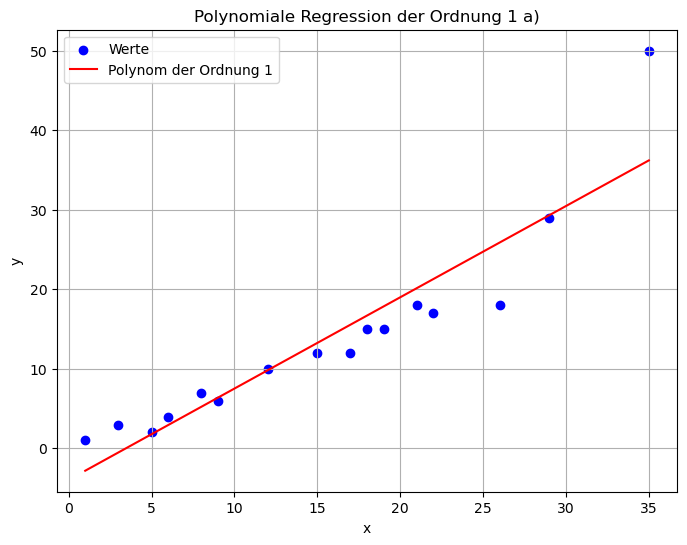

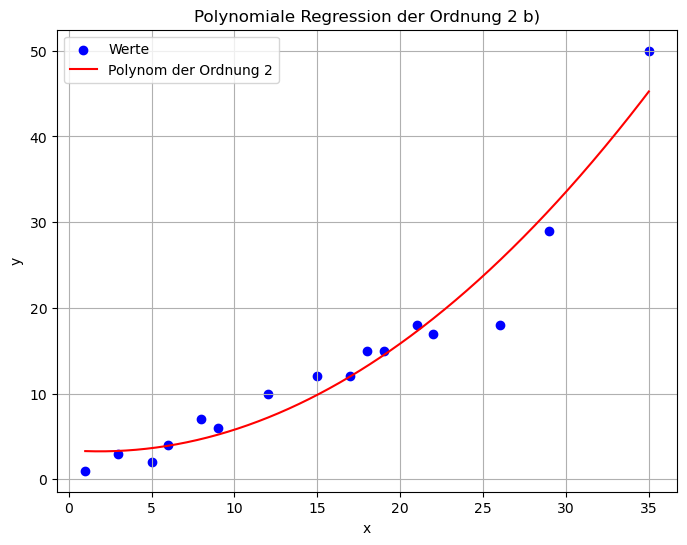

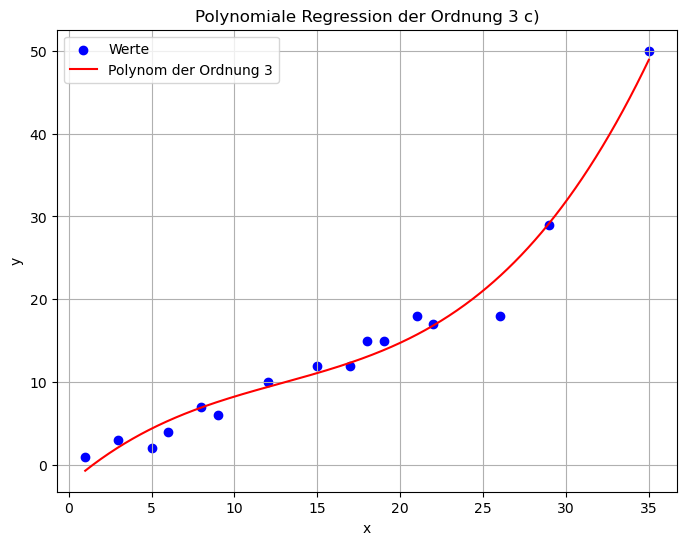

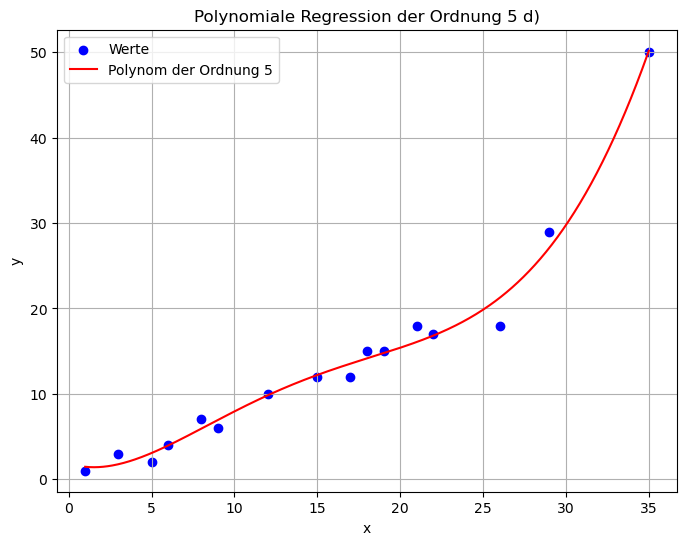

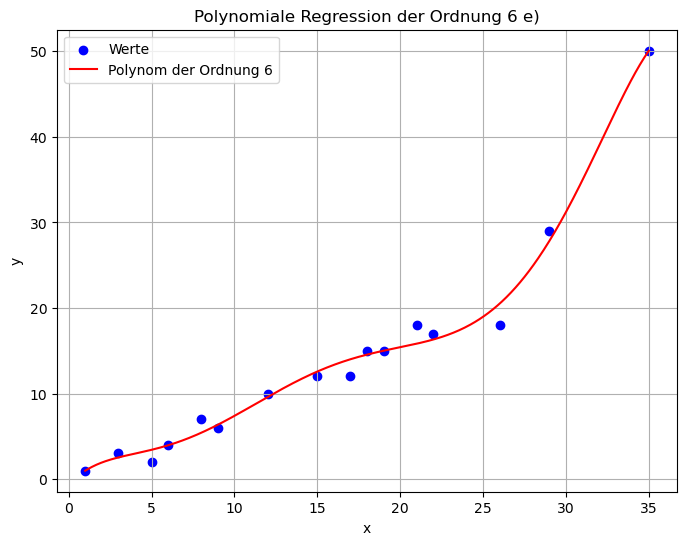

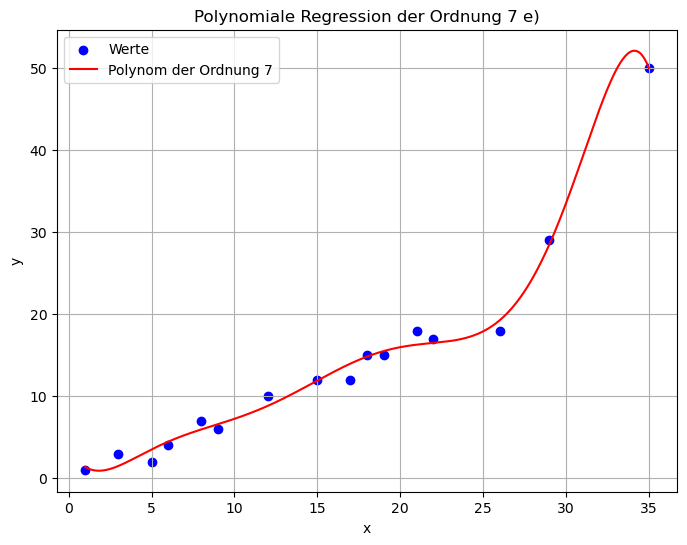

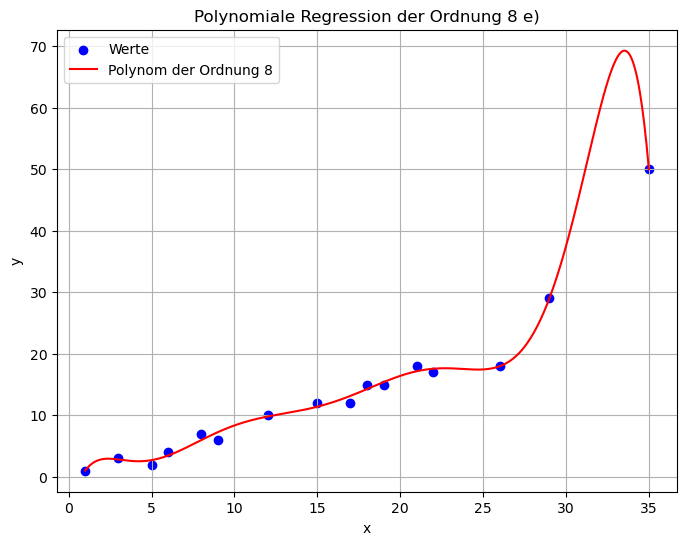

In [42]:
### Aufgabe 6 ###
import numpy as np
import matplotlib.pyplot as plt
print(np.__version__)

## Vektoren definieren
x_werte = np.array([1, 3, 5, 6, 8, 9, 12, 15, 17, 18, 19, 21, 22, 26, 29, 35])      # Vektoren sind gegeben aus Aufgabe 4
y_werte = np.array([1, 3, 2, 4, 7, 6, 10, 12, 12, 15, 15, 18, 17, 18, 29, 50])

## Funktion erstellen
def polynomiale_regression_plot(x, y, grad, titel_zusatz=""):                       # Programm zur Berechnung von Polynomen und plotten in einem Diagramm
    """
    Funktion führt eine polynomiale Regression durch und erstellt einen Plot.
    ----------------
    Parameter:
    - x: x-Werte
    - y: y-Werte
    - grad: Grad bzw. Ordnung des Polynoms
    - titel_zusatz: Zusatz für den Plot-Titel zur korrekten Aufgabeneinteilung (z. B. a, b, c, d, e)
    ----------------
    """
    koeffizienten = np.polyfit(x, y, grad)                                          # Berechnung der Koeffizienten des jeweiligen gewünschten Polynoms
    modell = np.poly1d(koeffizienten)                                               # Modellieren des jeweiligen gewünschten Polynoms mit Koeffizienten von np.polyfit
    
    kurve_fein = np.linspace(min(x), max(x), 500)                                   # 500 gleichmäßig verteilte x-Werte zwischen min(x) und max(x) = glattere Kurven durch dichtere x-Werte
    
    plt.figure(figsize=(8, 6))                                                      # Plot-Erstellung (Zeile 27-35)
    plt.scatter(x, y, color='blue', label='Werte')
    plt.plot(kurve_fein, modell(kurve_fein), color='red', label=f"Polynom der Ordnung {grad}")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f"Polynomiale Regression der Ordnung {grad} {titel_zusatz}")
    plt.legend()
    plt.grid()
    plt.show()

## Aufruf der Funktion für verschiedene Grade
grade = [1, 2, 3, 5, 6, 7, 8]                                                       # Anmerkung zu a): Beide Terme sind mathematisch äquivalent und somit im Code identisch --> hlin​(x) = y^​(x)
for i, grad in enumerate(grade):                                                    # for-Schleife über die einzelnen Grade                                                    
    if grad in [6, 7, 8]:
        titel_zusatz = "e)"                                                         # Titelzusatz für Grade 6, 7, 8 = e) = Teilaufgabe von Aufgabe 6
    else:
        titel_zusatz = f"{chr(97 + i)})"                                            # Titelzusatz für Grade 1-5 aufsteigend = a), b), c), d) = Teilaufgaben von Aufgabe 6; chr(97+1) = ASCII Code
    polynomiale_regression_plot(x_werte, y_werte, grad, titel_zusatz=titel_zusatz)

a) Die Wahrscheinlichkeit für genau 3-mal Kopf beträgt: 0.0923
a) Die Wahrscheinlichkeit für höchstens 3-mal Kopf beträgt: 0.1345


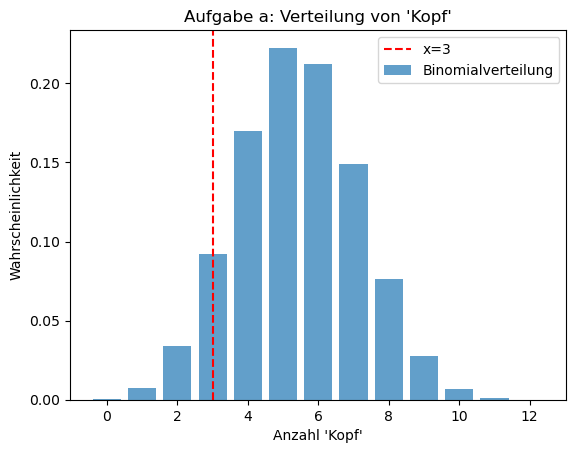

b) Die Wahrscheinlichkeit für 3 bis 7-mal Kopf beträgt: 0.8461


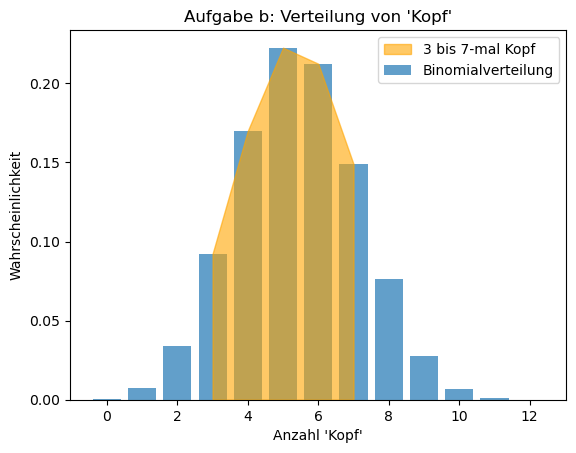

c) Der Erwartungswert bei 15 Würfen beträgt: 6.75


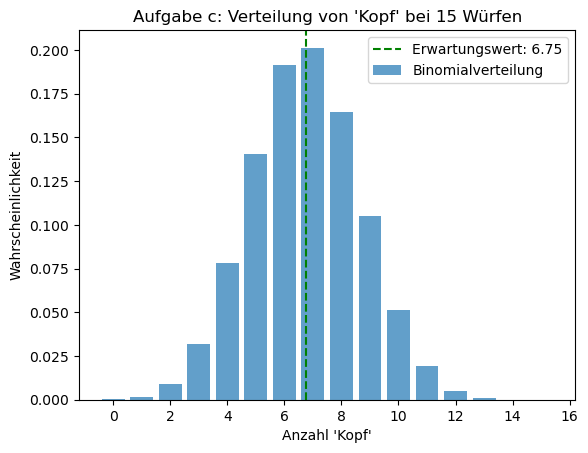

In [3]:
### Aufgabe 9 ###
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom                                                                       # Importieren der Binomialverteilung aus der Bibliothek SciPy.

## Gegebene Parameter
p = 0.45                                                                                            # Wahrscheinlichkeit für Kopf
n = 12                                                                                              # Anzahl der Würfe

## a) Wahrscheinlichkeit für genau 3-mal Kopf und höchstens 3-mal Kopf
def aufgabe_a():
    wahrsch_g_3 = binom.pmf(3, n, p)                                                                # Wahrscheinlichkeit für genau 3-mal Kopf
    
    wahrsch_h_3 = binom.cdf(3, n, p)                                                                # Wahrscheinlichkeit für höchstens 3-mal Kopf
    
    print(f"a) Die Wahrscheinlichkeit für genau 3-mal Kopf beträgt: {wahrsch_g_3:.4f}")             # Ausgeben der Wahrscheinlichkeit für genau 3-mal Kopf
    print(f"a) Die Wahrscheinlichkeit für höchstens 3-mal Kopf beträgt: {wahrsch_h_3:.4f}")         # Ausgeben der Wahrscheinlichkeit für höchstens 3-mal Kopf
    
    x = np.arange(0, n + 1)                                                                         # Plot-Erstellung (Zeile 19-27); # Erzeugt x-Werte von 0 bis 12
    pmf = binom.pmf(x, n, p)                                                                        # Wahrscheinlichkeitsverteilung für alle x-Werte
    plt.bar(x, pmf, label="Binomialverteilung", alpha=0.7)                                          # Erstellung eines Balkendiagramm der Wahrscheinlichkeiten
    plt.axvline(3, color='r', linestyle='--', label="x=3")                                          # Zeichnet eine vertikale Linie bei x = 3
    plt.title("Aufgabe a: Verteilung von 'Kopf'")                                                   # Setzt Titel des Diagramms
    plt.xlabel("Anzahl 'Kopf'")                                                                     # x-Achsenbeschriftung
    plt.ylabel("Wahrscheinlichkeit")                                                                # y-Achsenbeschriftung
    plt.legend()                                                                                    # Setzt Legende
    plt.show()                                                                                      # Gibt den Plot aus

## b) Wahrscheinlichkeit für 3 bis 7-mal Kopf
def aufgabe_b():
    wahrsch_3_bis_7 = binom.cdf(7, n, p) - binom.cdf(2, n, p)                                       # Wahrscheinlichkeit zwischen 3 und 7 Mal Kopf zu erhalten
    print(f"b) Die Wahrscheinlichkeit für 3 bis 7-mal Kopf beträgt: {wahrsch_3_bis_7:.4f}")         # Ausgeben der Wahrscheinlichkeit zwischen 3 und 7 Mal Kopf zu erhalten
    
    x = np.arange(0, n + 1)                                                                         # Plot-Erstellung (Zeile 34-42), Anmerkungen äquivalent siehe a)
    pmf = binom.pmf(x, n, p)
    plt.bar(x, pmf, label="Binomialverteilung", alpha=0.7)
    plt.fill_between(x[3:8], pmf[3:8], color='orange', alpha=0.6, label="3 bis 7-mal Kopf")         # Markiert den Bereich der Wahrscheinlichkeiten zwischen 3 und einschließlich 7
    plt.title("Aufgabe b: Verteilung von 'Kopf'")
    plt.xlabel("Anzahl 'Kopf'")
    plt.ylabel("Wahrscheinlichkeit")
    plt.legend()
    plt.show()

## c) Erwartungswert bei 15 Würfen
def aufgabe_c():
    n_neu = 15                                                                                      # Neue Anzahl an Würfen
    erwartungswert = n_neu * p
    print(f"c) Der Erwartungswert bei 15 Würfen beträgt: {erwartungswert:.2f}")                     # Ausgeben der Erwartung "wie viel Male Kopf im Mittel zu erwarten sei, bei 15 Würfen"
    
    x = np.arange(0, n_neu + 1)                                                                     # Plot-Erstellung (Zeile 50-58),  Anmerkungen äquivalent siehe a)
    pmf = binom.pmf(x, n_neu, p)
    plt.bar(x, pmf, label="Binomialverteilung", alpha=0.7)
    plt.axvline(erwartungswert, color='g', linestyle='--', label=f"Erwartungswert: {erwartungswert:.2f}")
    plt.title("Aufgabe c: Verteilung von 'Kopf' bei 15 Würfen")
    plt.xlabel("Anzahl 'Kopf'")
    plt.ylabel("Wahrscheinlichkeit")
    plt.legend()
    plt.show()

## Aufrufen der Funktionen                                                                          # Führt die definierten Funktionen aus und zeigt so Ergebnisse und Diagramme für a, b und c an
aufgabe_a()
aufgabe_b()
aufgabe_c()

"""
### Aufgabe 12 (Präsentationsaufgabe) ###

a) Wer ist der Entwickler von Python und wann wurde Python zur Nutzung freigegeben?

Der Entwickler von Python lautet Guido Van Rossum. Ein Niederländer, der 1989 sich mit einem "Hobbyprojekt" zunächste beschäftigte.
Der Name des einstigen "Hobbyprojekts" entsprang einer BBC TV Show names "Monty Python´s Flying Circus", da Van Rossum ein großer Fan war.
1991 wurde die erste Python Version (0.9.0) zur Nutzung veröffentlicht. Sie enthielt bereits einige Datentypen und Funktionen zur Fehlerbehandlung.

Quelle(n): https://aws.amazon.com/de/what-is/python/



b) Was sind die St¨arken von Python? Wieso sollte man Python einsetzen?

--> Grundsätzliches Verständnis: Stärken = Gründe für den Einsatz

Entwickler können Python Codes leicht lesen, aufgrund einer vereinfachten Syntax, wodurch die Python Syntax das Coden produktiver macht, da sie weniger Codezeilen braucht als andere Programmiersprachen.
Python verfügt über große Standardbibliotheken (bspw. math) und eine sehr aktive große Community, womit große Unterstützung für Entwickler geboten wird.
Python kann auf verschiedenen Computer-Betriebssystemen genutzt werden (Windows, macOS, Linux, Unix) = Plattformunabhängig.
Python ist eine Interpreter Sprache, wodurch der Code Zeile für Zeile gelesen wird und somit beim ersten Fehler nicht weiter ausgeführt wird. So können Fehler im Code schnell gefunden werden.
Python kann für Webentwicklung, Datenanalyse, maschinelles Lernen, Automatisierung, wissenschaftliches Rechnen und viele andere Bereiche verwendet werden = breite Anwendbarkeit.

Quelle(n): https://aws.amazon.com/de/what-is/python/; https://blog.rwth-aachen.de/itc/2024/05/06/python/



c) Nennen Sie Schwächen von Python und welche alternativen Programmiersprachen entsprechend des Nachteils von Python existieren

Python ist im Vergleich zu anderen Programmiersprachen relativ langsam und eignet sich für bestimmte Anwendungen nur bedingt.
Mit Hinblick auf bspw. C, kann Python zwar Applikationen deutlich schneller erstellen, ist jedoch in der Ausführung dieser dann eher deutlich langsamer.
Python ist in der Entwicklung mobiler Apps ebenso nicht weit verbreitet, wie die Sprachen Swift (iOS) und Kotlin (Android), da es hierfür nicht sehr ausgereift ist. Die niedrige Verarbeitungsgeschwindigkeit von Python und die geringe Speichereffizienz sind die beiden Hauptgründe, warum Python nicht für die mobile Datenverarbeitung geeignet ist.
Der Speicherverbrauch von Python kann im Vergleich zu anderen Programmiersprachen (C oder C++), aufgrund seiner dynamischen Typisierung und automatischen Speicherverwaltung höher sein. 

Quelle(n): https://steemit.com/deutsch/@rilc0n/python-fuer-anfaenger-1-einfuehrung-vor-und-nachteile; https://www.computerwoche.de/article/2816926/wie-sich-c-gegen-c-python-und-co-schlaegt.html; https://de.itpedia.nl/2023/07/13/6-moderne-programmeertalen-en-hun-downsides/; https://thecodest.co/blog/pros-and-cons-of-python/

CHATGPT: 
1. **Langsame Ausführungsgeschwindigkeit:**  
   Python ist im Vergleich zu C++ oder Java langsamer, da es interpretiert wird und keine kompilierten Binärdateien erstellt.  
   **Alternative:** C++ oder Java, die schneller sind und in Hochleistungsanwendungen genutzt werden.

2. **Hoher Speicherverbrauch:**  
   Python verbraucht mehr Speicher als C oder Go.  
   **Alternative:** Sprachen wie C oder Go sind ressourceneffizienter.

3. **Global Interpreter Lock (GIL):**  
   Dieses Hindernis verhindert echtes Multithreading in Python.  
   **Alternative:** Java, die eine bessere Unterstützung für Multithreading bietet.

4. **Dynamische Typisierung:**  
   Kann zu Laufzeitfehlern führen.  
   **Alternative:** Sprachen wie Java oder C# mit statischer Typisierung.



d) Was ist mit der vektorisierten Programmierung gemeint und welche Vorteile bietet diese?

Vektorisierung beschreibt in der Praxis die Ausführung von Operationen durch Array-Ausdrücke, anstelle von bspw. for-Schleifen. Hierzu findet die NumPy-Bibliothek ihre Anwendung. Dadurch wird ein kompakterer Code, sowie eine perfomantere Datenverarbeitung ermöglicht.

Quelle(n): https://www.python4data.science/de/latest/workspace/numpy/vectorisation.html



e) Ist Python plattformabhängig?

Nein, Python ist nicht plattformabhängig.
    ii) Wenn nein:  
Python ist plattformunabhängig. Das bedeutet, dass ein einmal geschriebener Python-Code auf verschiedenen Betriebssystemen ausgeführt werden kann, sofern ein Interpreter dort vorhanden ist.

Quelle(n): https://www.retresco.de/lexikon/python/ 

f) Nennen Sie Python-Umgebungen/-Bibliotheken, welche mathematische Werkzeuge bereithalten

1. NumPy: Für numerische Berechnungen und lineare Algebra.  
2. SciPy: Erweiterung auf Basis von NumPy für wissenschaftliche Berechnungen und Analysen.
3. Scikit-Learn: Scikit-Learn, ursprünglich eine Drittanbieter-Erweiterung der SciPy-Bibliothek, ist jetzt eine unabhängige Python-Bibliothek auf Github. Sie umfasst DBSCAN, Gradient Boosting, Support Vector Machines, Random Forests und Funktionen zur Datenklassifizierung und -modellierung.  
4. SymPy: Durchführen von symbolischen mathematischen Berechnungen 
5. Pandas: Datenmanipulation und -analyse.  
6. Theano: Für numerische Berechnungen, die für maschinelles Lernen und Deep Learning entwickelt wurde. Sie definiert, optimiert und wertet mathematische Ergebnisse effizient aus und ermöglicht die Verwendung von dimensionalen Arrays in Deep-Learning-Modellen. Theano bietet integrierte Validierungs- und Einheitstests, leistungsstarke Berechnungen, schnelle und stabile Auswertungen.
((7. Pytorch: Open-Source-Python-Bibliothek, wurde 2016 vom Facebook-KI-Forschungsteam entwickelt und ist eine beliebte Python-Bibliothek für Deep-Learning-Anwendungen wie NLP und Computer Vision. Sie bietet eine hohe Ausführungsgeschwindigkeit, Flexibilität, leistungsstarke APIs und ein Toolkit für natürliche Sprache. Zu den wichtigsten Funktionen gehören statistische Verteilung, Datenkontrolle und die Entwicklung von Deep-Learning-Modulen.))
((8. TensorFlow: Führende Python-Bibliothek für Deep-Learning-Anwendungen, die vom Google Brain-Team entwickelt wurde. Wird häufig zur Implementierung von Reinforcement Learning in Deep-Learning-Modellen verwendet. Sie bietet flexible Werkzeuge, Bibliotheken und Community-Ressourcen für die Erstellung von Deep-Learning-Modellen und neuronalen Netzen.))

Quelle(n): https://www.unite.ai/de/10-best-python-libraries-for-deep-learning/; https://www.tu-chemnitz.de/mathematik/wire/teaching/SS22/mathematisches_programmieren/symbolisches_rechnen.html 



g) Nennen Sie mindestens eine Bibliothek zum Plotten

1. Matplotlib: Umfangreiche Bibliothek für 2D- und 3D-Plotting.  
2. Seaborn: Erweiterung von Matplotlib für statistische Plots.  
3. Plotly: Für interaktive und webbasierte Grafiken. 
4. Bokeh: Für interaktive Visualisierungen und für die Einbettung in Webanwendungen konzipiert; es gibt seine Plots als HTML-Dateien aus.
5. Altair: Basiert auf einer speziellen "Plotsprache" namens Vega. 
6. Pygal: Erzeugt standardgemäß SVG-Diagramme

Quelle(n): https://opensource.com/article/20/4/plot-data-python; https://www.pygal.org/en/stable/ 

a) Die Allgemeine Lösung lautet: Eq(y(x), C1*exp(x*(2 - sqrt(5))) + C2*exp(-x*(2 + sqrt(5))))


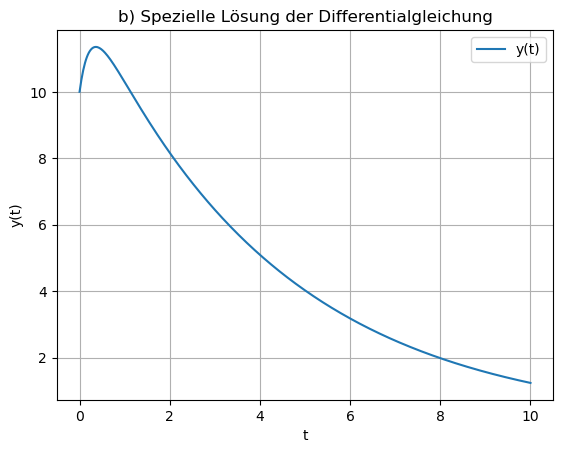

In [23]:
### Aufgabe 15 ###
import sympy as sp                                                                                          # Sympy für symbolische Mathematik
import numpy as np                                                                                          # Numpy für numerische Berechnungen
import matplotlib.pyplot as plt                                                                             # Matplotlib für Plots
from scipy.integrate import solve_ivp                                                                       # Funktion-Import, um Anfangswertprobleme für Differentialgleichungen numerisch zu lösen

## a) Allgemeine Lösung der Differentialgleichung
## Differentialgleichung: y'' + 2*√(5)*y' + y = 0
x = sp.symbols('x')                                                                                         # Definition eines mathematischen Symbols 
y = sp.Function('y')                                                                                        # Definition einer mathematischen Funktion

gleichung = sp.Eq(y(x).diff(x, 2) + 2 * sp.sqrt(5) * y(x).diff(x) + y(x), 0)                                # Definition der Gleichung

allgemeine_lösung = sp.dsolve(gleichung)                                                                    # Lösen der Gleichung
print(f"a) Die Allgemeine Lösung lautet: {allgemeine_lösung}")                                              # Ausgabe der Gleichung

## b) Spezielle Lösung für Anfangswerte y(0) = 10 und y'(0) = 10
def diff_gleichung(t, y):                                                                                   # Definiert die Differentialgleichung als ein System erster Ordnung
    return [y[1], -2 * np.sqrt(5) * y[1] - y[0]]

y0 = [10, 10]                                                                                               # Anfangswerte [y(0), y'(0)]

t_span = (0, 10)                                                                                            # Bereich für die Lösung
t_eval = np.linspace(*t_span, 500)                                                                          # Erzeugen von 500 gleichmäßig verteilten Werten zwischen 0 und 10

lösung = solve_ivp(diff_gleichung, t_span, y0, t_eval=t_eval)                                               # numerisches Lösen

## Plotten der speziellen Lösung
plt.plot(lösung.t, lösung.y[0], label="y(t)")
plt.title("b) Spezielle Lösung der Differentialgleichung")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid()
plt.show()